#Modelo de Machine Learning para la deteccion temprana de la Enfermedad de las Arterias Coronarias


La Enfermedad Isquémica del Corazón (EIC) representa una de las principales causas de mortalidad a nivel mundial. Esta afección cardíaca se caracteriza por la presencia de isquemia miocárdica, hipoxia o necrosis en el músculo cardíaco, y su origen está estrechamente relacionado con el estrechamiento u obstrucción de las arterias coronarias, principalmente debido a la acumulación de placas de aterosclerosis.

Para comprender la gravedad de la EIC, es esencial conocer la anatomía del sistema coronario, que es el conjunto de arterias encargadas de suministrar sangre al corazón. Las tres arterias coronarias principales son la Arteria Descendente Anterior Izquierda (ADA), la Arteria Circunfleja Izquierda (ALC) y la Arteria Coronaria Derecha (AD). Cuando la luz de cualquiera de estas arterias se estrecha en un 50% o más de su diámetro original, se diagnostica la Enfermedad de las Arterias Coronarias (EAC).

La EAC es una condición altamente letal, y su detección y diagnóstico tempranos son esenciales para salvar vidas y mejorar el pronóstico de los pacientes. La angiografía coronaria se considera el "estándar de oro" para el diagnóstico de la EAC, ya que proporciona imágenes detalladas de las arterias coronarias y permite identificar obstrucciones significativas. Sin embargo, este procedimiento es invasivo y no está ampliamente disponible en todos los entornos médicos.

Las cifras de mortalidad por EAC son alarmantes. Según la Organización Mundial de la Salud (OMS), la enfermedad cardiovascular, que incluye la EIC, es la principal causa de muerte en todo el mundo. En 2019, se estimó que las enfermedades cardiovasculares causaron aproximadamente 18.6 millones de muertes, lo que representó el 32% de todas las muertes a nivel global. Entre estas, la EAC desempeña un papel significativo.

Dada la limitada disponibilidad de la angiografía coronaria en muchos países, especialmente en aquellos en desarrollo o con recursos médicos limitados, la búsqueda de métodos de detección no invasiva de la EAC se ha convertido en un área de investigación crítica. Aquí es donde entran en juego los algoritmos de aprendizaje automático, que tienen el potencial de analizar datos clínicos y de imágenes para identificar de manera precisa y temprana la presencia de EAC en pacientes de alto riesgo.

En resumen, la Enfermedad Isquémica del Corazón y la Enfermedad de las Arterias Coronarias son problemas médicos de gran relevancia global debido a su alta mortalidad. La detección temprana y precisa es esencial para abordar esta amenaza para la salud pública, y los algoritmos de aprendizaje automático ofrecen una vía prometedora para lograrlo, especialmente en regiones donde la angiografía coronaria es limitada en su disponibilidad.

##El objetivo es crear un modelo de aprendizaje automático para detectar EAC
fuente:
- https://www.kaggle.com/datasets/saeedeheydarian/classification-of-coronary-artery-disease
- Centro Cardiovascular, Médico y de Investigación Shaheed Rajaie de Teherán (Irán).

*ESTE ES UN PROYECTO UNICAMENTE CON PROPOSITO DE APRENDIZAJE*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/CAD.csv")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [ ]:
data.describe(percentiles=[0.1,0.2,0.3,0.4,0.6,0.7,0.9])

,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,...,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,129.554455,...,19.462046,13.153465,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462
std,10.392278,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,18.938105,...,15.936475,1.610452,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531
min,30.000000,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,...,1.000000,8.900000,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000
10%,47.000000,60.000000,152.000000,22.338318,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,...,4.000000,11.000000,3.700000,137.000000,5100.000000,19.000000,49.000000,170.000000,35.000000,0.000000
20%,50.000000,63.400000,155.000000,24.040503,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,...,7.000000,11.900000,3.900000,138.000000,5700.000000,25.000000,51.000000,178.000000,40.000000,0.000000
30%,52.000000,66.600000,160.000000,24.905285,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,...,10.000000,12.400000,4.000000,139.000000,6000.000000,28.000000,55.000000,188.000000,45.000000,0.000000
40%,55.000000,70.000000,162.000000,25.951557,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,...,12.000000,12.900000,4.100000,140.000000,6600.000000,30.000000,58.000000,196.800000,45.000000,0.000000
50%,58.000000,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000,...,15.000000,13.200000,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000
60%,62.000000,75.200000,168.000000,27.774799,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000,...,18.000000,13.600000,4.300000,142.000000,7620.000000,34.000000,62.000000,220.000000,50.000000,0.000000


Cad  216
Normal  87


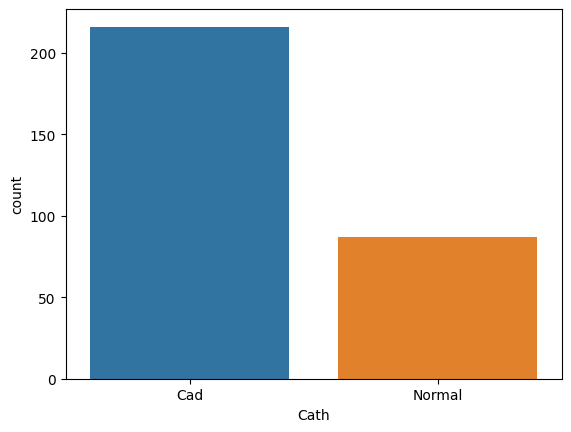

In [ ]:
#@title El dataset consta de 303 registros de pacientes, de los cuales 216 tienen EAC
condition_counts = data.Cath.value_counts()
print("Cad ", condition_counts[0])
print("Normal ",condition_counts[1])
plt.figure()
sns.countplot(x=data.Cath, data=data)
plt.show()

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:

num_cols = ['Age','Weight', 'Length','BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE']

cat_cols = ['Sex', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion', 'LVH', 'Poor R Progression']

ord_cols = ['Function Class', "Region RWMA", "VHD"]

In [ ]:
for num_col in num_cols:
  print('* '+ num_col + " => " + format(data[num_col].nunique()))

* Age => 46
* Weight => 54
* Length => 44
* BMI => 262
* BP => 17
* PR => 21
* FBS => 113
* CR => 18
* TG => 147
* LDL => 110
* HDL => 47
* BUN => 33
* ESR => 58
* HB => 66
* K => 27
* Na => 25
* WBC => 78
* Lymph => 50
* Neut => 52
* PLT => 135
* EF-TTE => 11


In [ ]:
for cat_col in cat_cols:
  print('* ' + cat_col + ' => ' + format(data[cat_col].unique()))

* Sex => ['Male' 'Fmale']
* DM => [0 1]
* HTN => [1 0]
* Current Smoker => [1 0]
* EX-Smoker => [0 1]
* FH => [0 1]
* Obesity => ['Y' 'N']
* CRF => ['N' 'Y']
* CVA => ['N' 'Y']
* Airway disease => ['N' 'Y']
* Thyroid Disease => ['N' 'Y']
* CHF => ['N' 'Y']
* DLP => ['Y' 'N']
* Edema => [0 1]
* Weak Peripheral Pulse => ['N' 'Y']
* Lung rales => ['N' 'Y']
* Systolic Murmur => ['N' 'Y']
* Diastolic Murmur => ['N' 'Y']
* Typical Chest Pain => [0 1]
* Dyspnea => ['N' 'Y']
* Atypical => ['N' 'Y']
* Nonanginal => ['N' 'Y']
* Exertional CP => ['N']
* LowTH Ang => ['N' 'Y']
* Q Wave => [0 1]
* St Elevation => [0 1]
* St Depression => [1 0]
* Tinversion => [1 0]
* LVH => ['N' 'Y']
* Poor R Progression => ['N' 'Y']


In [ ]:
for ord_col in ord_cols:
  print('* ' + ord_col + ' => ' + format(data[ord_col].unique()))

* Function Class => [0 3 2 1]
* Region RWMA => [0 4 2 3 1]
* VHD => ['N' 'mild' 'Severe' 'Moderate']


In [ ]:
vhd = {'N': 0, 'mild': 1, 'Severe': 2, 'Moderate': 3}
sex = {'Male': 'Male', 'Fmale': 'Female'}
data['VHD'] = data['VHD'].map(vhd)
data['Sex'] = data['Sex'].map(sex)

data.replace('N', 0, inplace=True)
data.replace('Y', 1, inplace=True)

Visualizacion de Datos categoricos

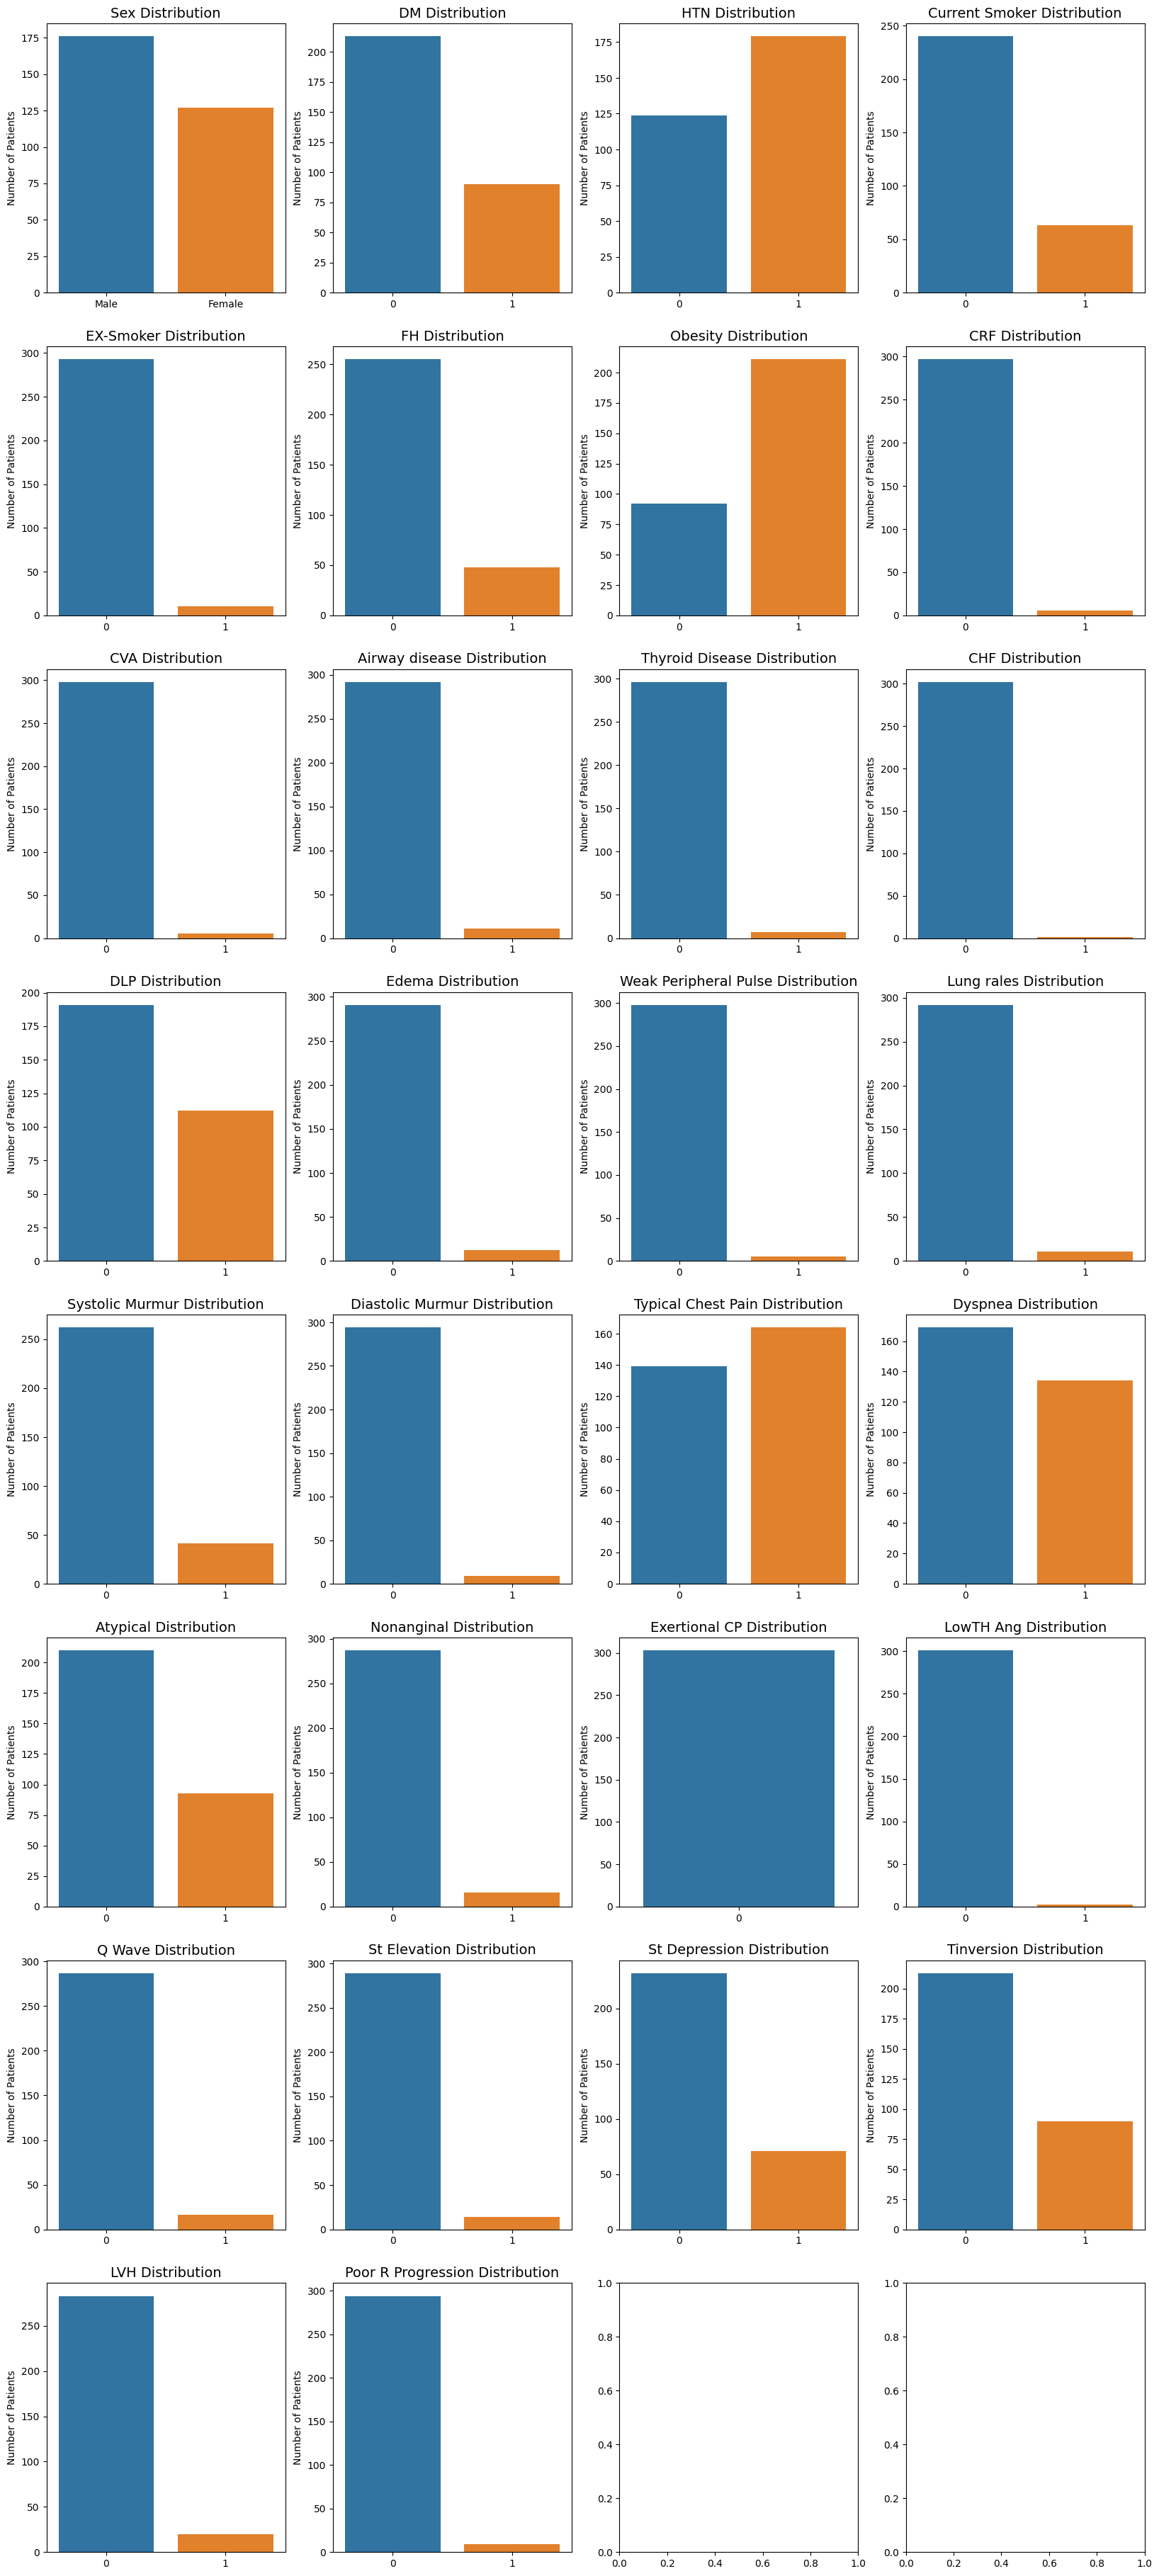

In [ ]:
#para las variables categoricas
n_rows,n_cols = 8,4
fig, axes = plt.subplots(n_rows, n_cols,figsize=(20,30))
for i, col in enumerate(cat_cols):
  ax_row,ax_col=i//n_cols,i% n_cols
  sns.countplot(x=col, data=data, ax=axes[ax_row,ax_col])
  axes[ax_row, ax_col].set_title(f'{col} Distribution', fontsize=14)
  axes[ax_row, ax_col].set_xlabel("")
  axes[ax_row, ax_col].set_ylabel("Number of Patients")
  fig.subplots_adjust(top=1.3)

por lo que se ve en los graficos la variable exertional chest pain no contribuye nada para la prediccion de clasificacion, por lo tanto sera eliminada, tambien se puede observar un problema de desequilibrio de clases y de igual manera la variable objetivo no esta balanceada

In [ ]:
del data['Exertional CP']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    int64  
 11  CRF                    303 non-null    int64  
 12  CVA                    303 non-null    int64  
 13  Airway disease         303 non-null    int64  
 14  Thyroid Disease        303 non-null    int64  
 15  CHF   

Visualizacion de datos ordinarios

[Text(0, 0, 'Normal'),
 Text(1, 0, 'Mild'),
 Text(2, 0, 'Moderate'),
 Text(3, 0, 'Severe')]

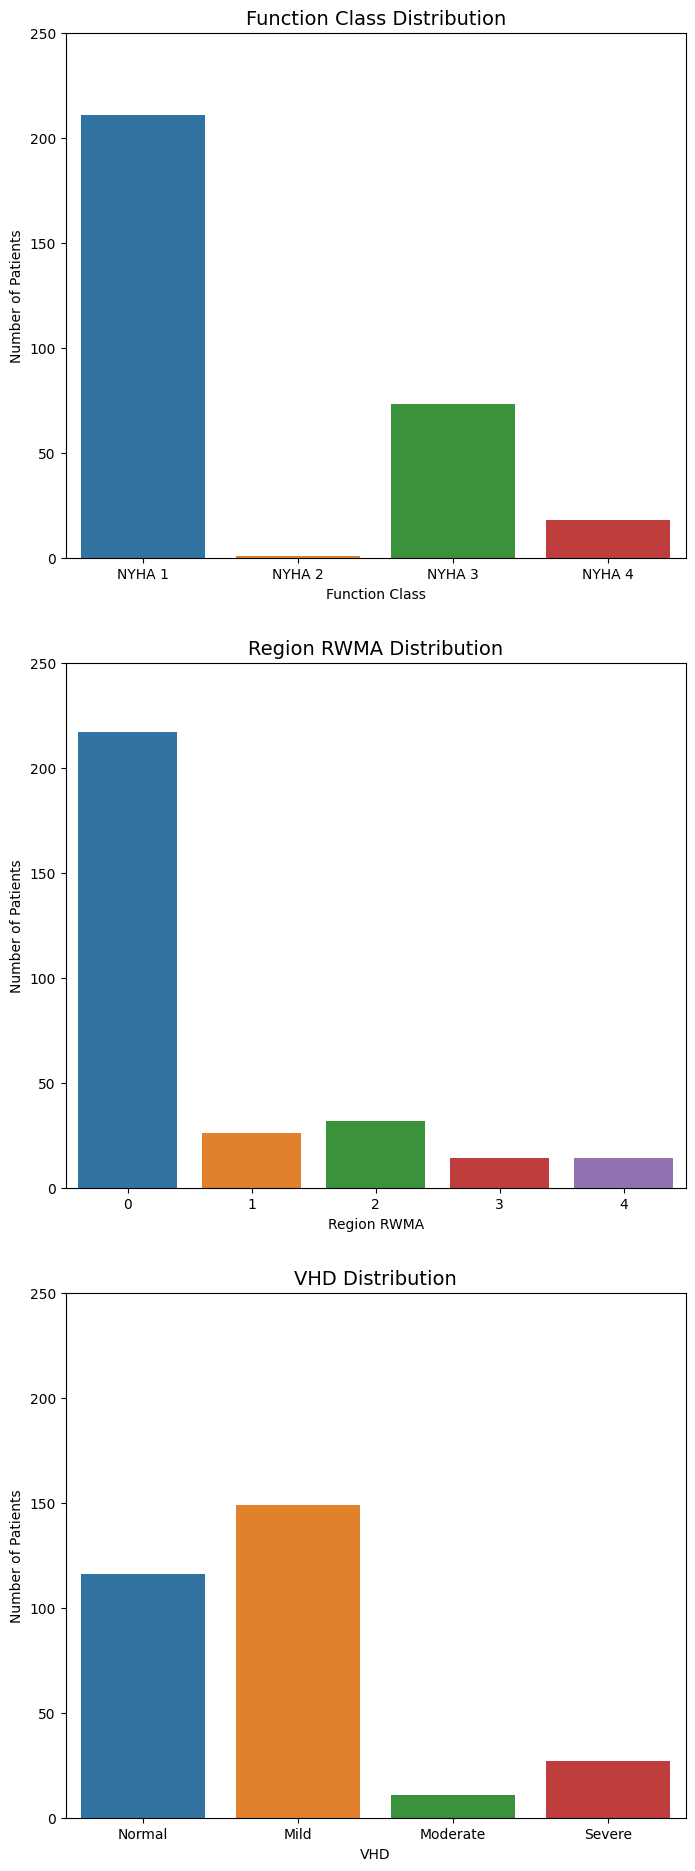

In [ ]:
n_rows,n_cols = 3, 1
fig, axes = plt.subplots(n_rows,n_cols, figsize=(8,15))
for i, col in enumerate(ord_cols):
  ax_row, ax_col = i//n_cols,i% n_cols
  sns.countplot(x=col, data=data, ax=axes[i])
  axes[i].set_title(f'{col} Distribution', fontsize=14)
  axes[i].set_ylabel("Number of Patients")
  axes[i].set_ylim([0, 250])
  fig.subplots_adjust(top=1.3)
axes[0].set_xticklabels(['NYHA 1', 'NYHA 2', 'NYHA 3', 'NYHA 4'])
axes[2].set_xticklabels(['Normal', 'Mild', 'Moderate', 'Severe'])


tambien se observa un problema de desbalance

Visualizacion de datos numericos

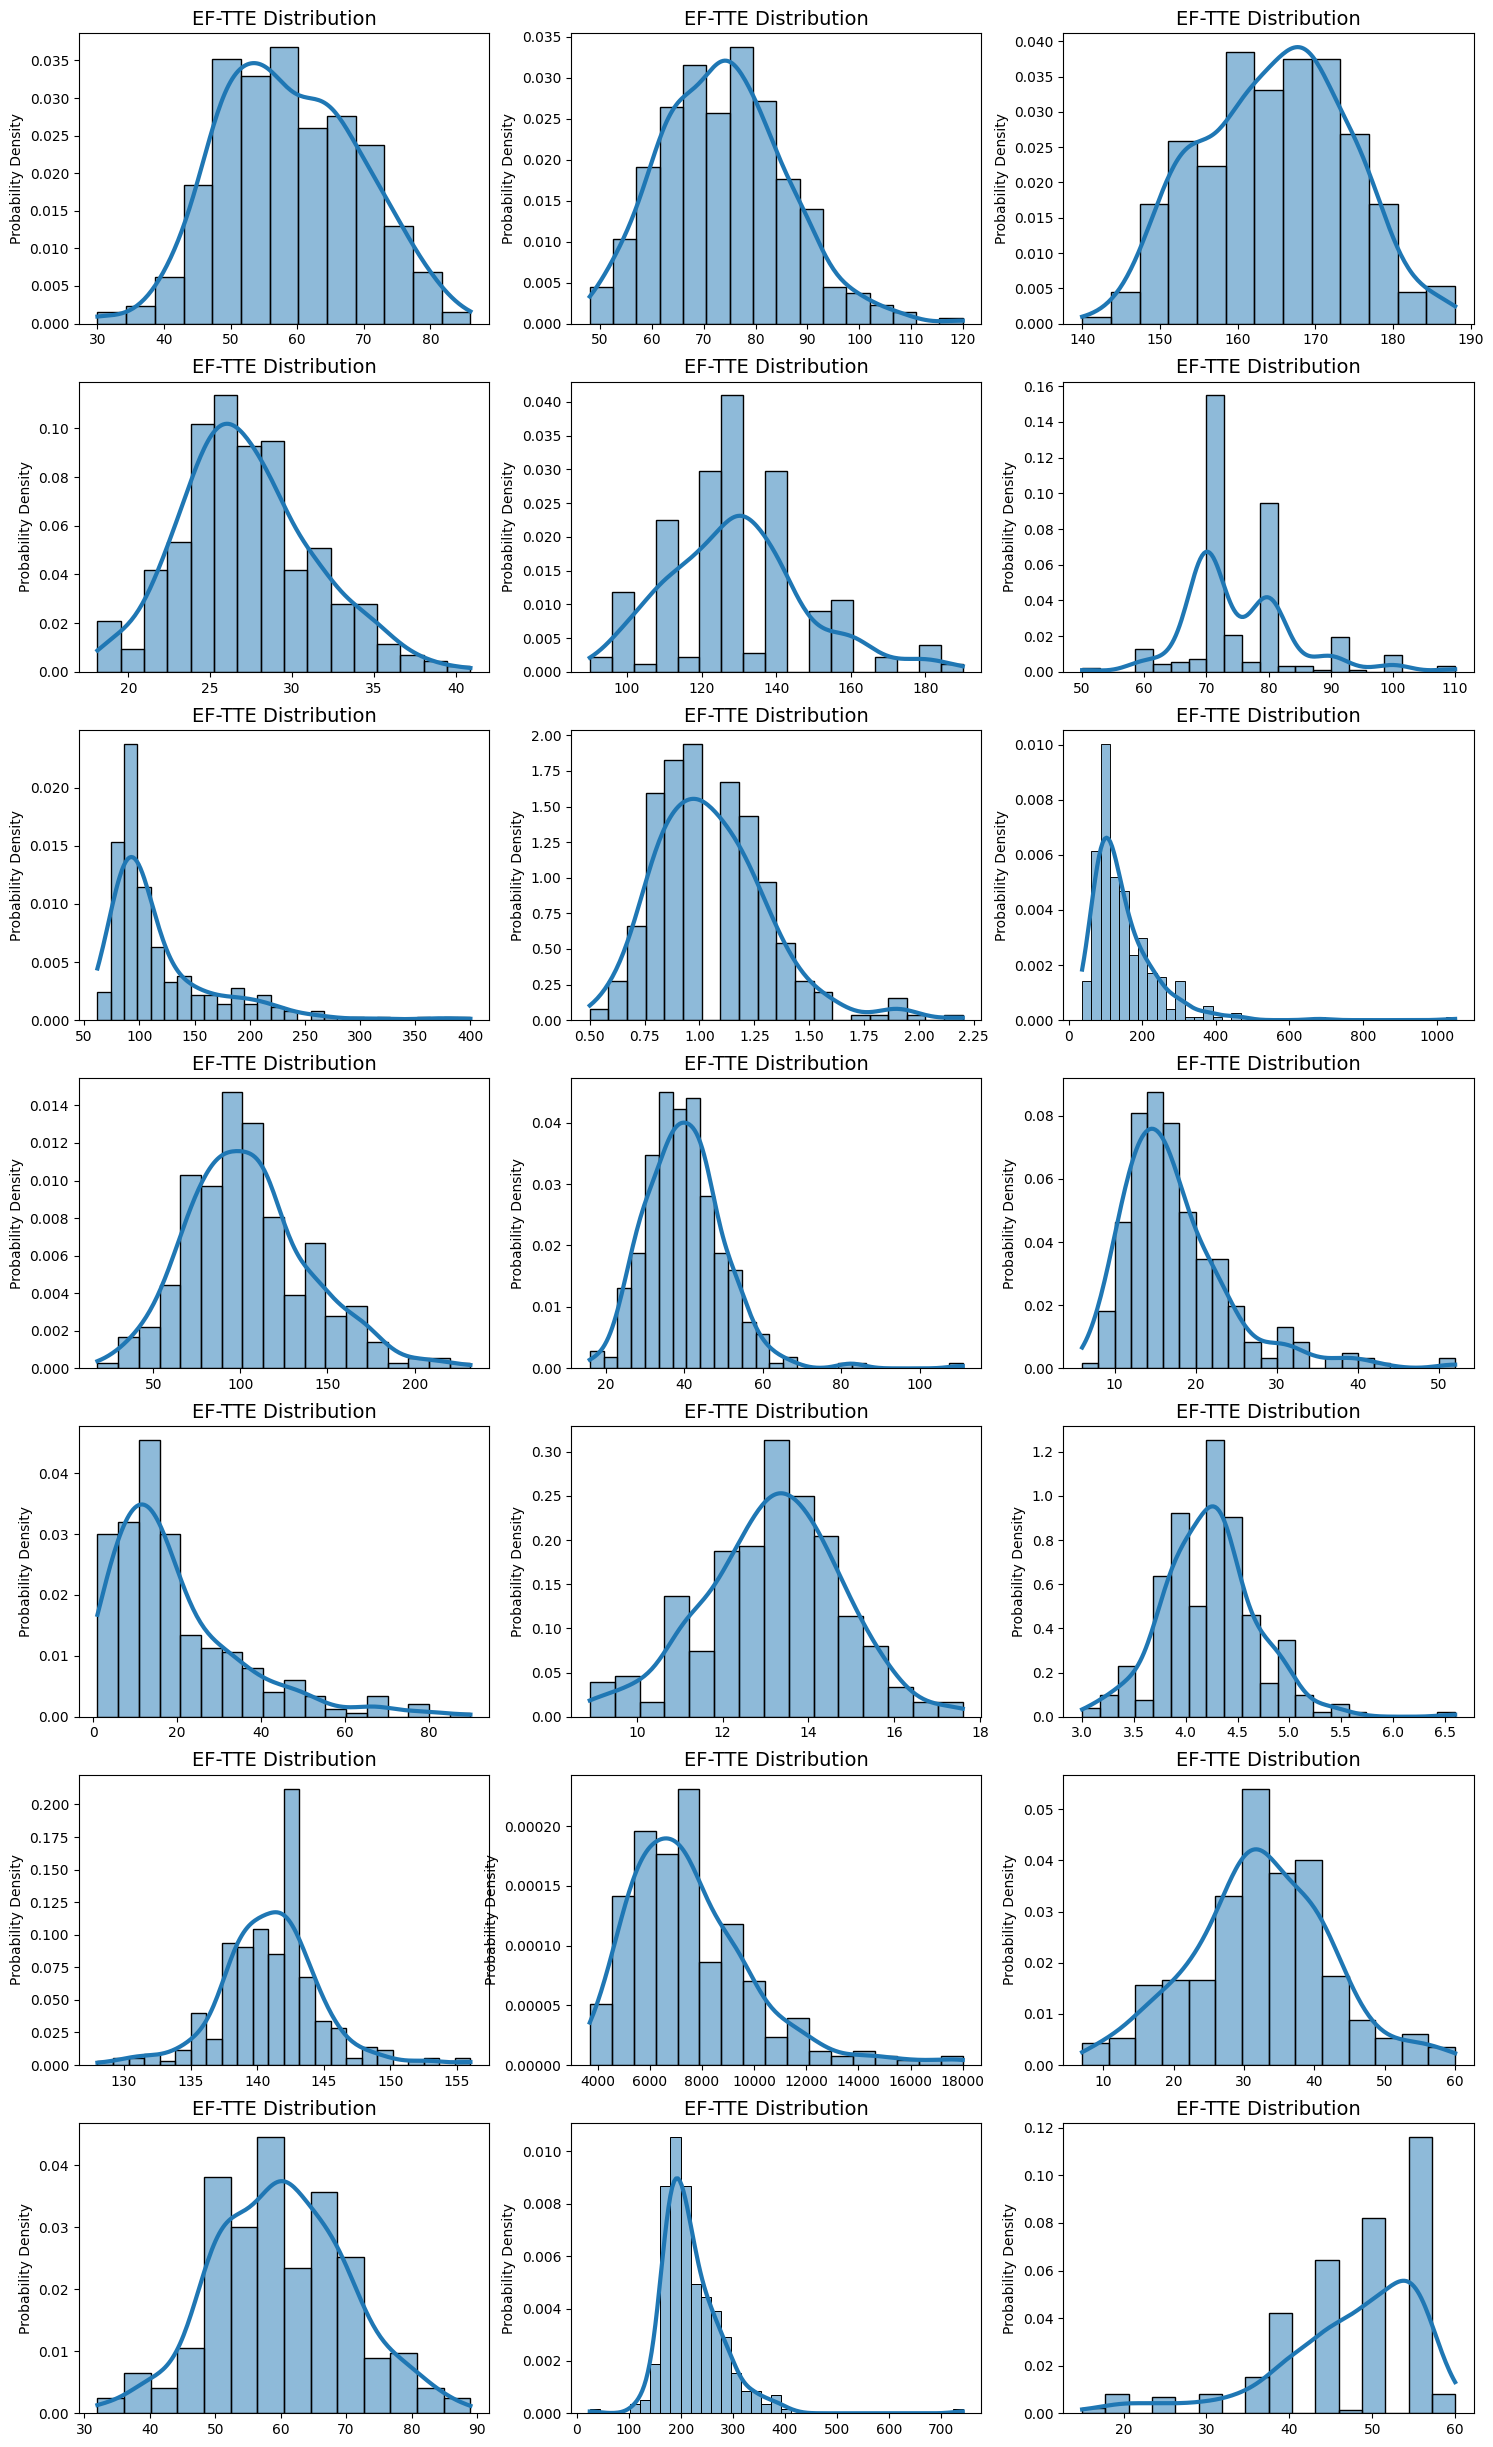

In [ ]:
n_rows, n_cols = 7, 3
fig, axes = plt.subplots(n_rows,n_cols, figsize=(18,20))
for i, col in enumerate(num_cols):
  i, j = i//n_cols, i%n_cols
  sns.histplot(data[col], label=col, ax=axes[i, j], kde=True, line_kws={"lw": 3}, stat="density")
  axes[i,j].set_title(f'{num_col} Distribution', fontsize=14)
  axes[i,j].set_ylabel("Probability Density", fontsize="medium")
  axes[i,j].set_xlabel("")
fig.subplots_adjust(top=1.3)

dividir la data para training y testing

In [ ]:
traindata = data.iloc[:200,:54]
trainlabels = data.iloc[:200,54:55]

In [ ]:
traindata.head(10)


,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,0,Cad
1,67,70,157,Female,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,0,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,1,Cad
3,66,67,158,Female,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,2,Normal
4,50,87,153,Female,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,2,Normal
5,50,75,175,Male,24.489796,0,0,1,0,0,...,4.2,141,7300,26,66,194,50,0,0,Cad
6,55,80,165,Male,29.384757,0,0,0,1,0,...,4.8,139,9400,58,33,292,40,4,1,Cad
7,72,80,175,Male,26.122449,1,0,1,0,0,...,4.3,142,12200,25,74,410,45,4,1,Cad
8,58,84,163,Female,31.615793,0,0,0,0,0,...,3.4,139,5100,49,50,370,50,0,0,Normal
9,60,71,170,Male,24.567474,1,0,0,0,0,...,4.6,140,4900,55,42,380,40,2,0,Cad


In [ ]:
trainlabels.head()

""
0
1
2
3
4


In [ ]:
testdata = data.iloc[200:275,:54]
testlabels = data.iloc[200:275,54:55]

In [ ]:
testdata.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
200,57,90,168,Female,31.887755,0,1,0,0,1,...,3.2,140,9800,21,70,184,50,0,1,Cad
201,44,79,165,Male,29.017447,1,1,0,0,0,...,3.9,132,5500,40,60,193,20,0,3,Normal
202,71,78,164,Male,29.000595,0,1,0,0,0,...,4.6,141,4100,32,62,173,45,3,1,Cad
203,41,86,155,Female,35.796046,1,1,0,0,0,...,4.1,142,9300,43,50,249,50,0,0,Normal
204,50,89,159,Female,35.204304,0,0,0,0,1,...,4.3,143,7900,30,65,260,55,0,0,Normal


In [ ]:
testlabels.head()

""
200
201
202
203
204
